# 1. Import and Install Dependencies

#ORIGINAL 
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib 

In [ ]:
# !pip install --upgrade tensorflow-gpu --user

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install daal==2021.4.0

In [ ]:
# !pip install --force-reinstall numpy==1.22

In [ ]:
# !pip install typing extension 

In [ ]:
# !pip install tensorflow==2.12.0 --user

In [1]:
!pip install opencv-python --user
!pip install mediapipe 

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
     ---------------------------------------- 49.8/49.8 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 2.5 MB/s eta 0:00:00
  Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-win_amd64.whl (44.9 MB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 2.5/2.5 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 54.9/54.9 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.9 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 36, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\KIIT\AppData\Local\Temp\pip-install-cr5xj7g3\sklearn_58d384b5ec4c41fcb9748a8964a65bf5\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\Users\KIIT\Anaconda\envs\gputest\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint

In [37]:
!pip install scikit-learn 

     ---------------------------------------- 7.1/7.1 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 2.3 MB/s eta 0:00:00


In [1]:
import sklearn as sklearn

In [35]:
!pip install matplotlib

In [2]:
!pip install -U mediapipe==0.8.8.0 --user

     ---------------------------------------- 45.8/45.8 MB 2.4 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model 
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    #above statement as the opencv reads the image in bgr form but mediapipe needs rgb form to work further
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction, image is going to be our frame from open cv
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

#Trial for the mediapipe one

cap = cv2.VideoCapture(0) #opening the webcam
#access mediapipe model 

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():#double checking the webcam is opened

        # Read feed
        ret, frame = cap.read()

        #make predictions 
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Show to screen
        cv2.imshow('OpenCV Feed', frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #if we press q then its going to break the loop and stop the video
            break
    cap.release()
    cv2.destroyAllWindows()

len(results.face_landmarks.landmark)
#face and hand if zero it means nothing was recorded

len(results.left_hand_landmarks.landmark)
#this will throw an error if we dont have the hand in the webcam

In [5]:
def draw_landmarks(image, results): #FACEMESH_TESSELATION replced FACE_CONNECTIONS
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

draw_landmarks(frame, results)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#trial with Draw landmarks 


cap = cv2.VideoCapture(0) #opening the webcam
#Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): #double checking the webcam is opened

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #if we press q then its going to break the loop and stop the video
            break
    cap.release()
    cv2.destroyAllWindows()

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), #this is the dot color 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) #this is the line color
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

#### Reading through the webcam

#Trial for this below one

cap = cv2.VideoCapture(0) #opening the webcam
while cap.isOpened():#double checking the webcam is opened
    # Read feed
    ret, frame = cap.read()
    # Show to screen
    cv2.imshow('OpenCV Feed', frame)
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'): #if we press q then its going to break the loop and stop the video
        break
cap.release()
cv2.destroyAllWindows()

In [7]:
cap = cv2.VideoCapture(0) #opening the webcam
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): #double checking the webcam is opened

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #if we press q then its going to break the loop and stop the video
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

len(results.left_hand_landmarks.landmark)

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

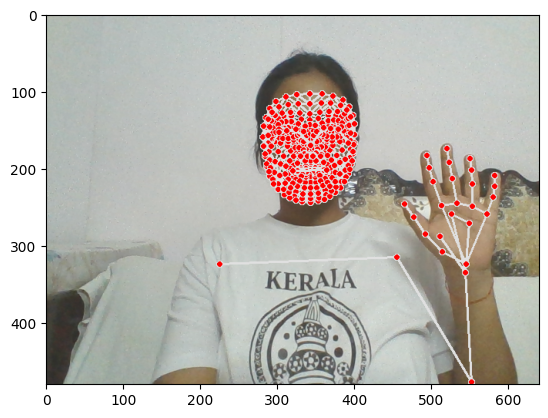

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.pose_landmarks.landmark)

33

In [12]:
results.pose_landmarks.landmark[0]

x: 0.5364261269569397
y: 0.35521450638771057
z: -0.6397054195404053
visibility: 0.9999534487724304

In [13]:
results.pose_landmarks.landmark[0].x

0.5364261269569397

In [14]:
results.pose_landmarks.landmark[0].y

0.35521450638771057

In [15]:
results.pose_landmarks.landmark[0].z

-0.6397054195404053

In [16]:
results.pose_landmarks.landmark[0].visibility

0.9999534487724304

In [17]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

Another way this can be written is

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])

In [18]:
pose

[array([ 0.53642613,  0.35521451, -0.63970542,  0.99995345]),
 array([ 0.56290859,  0.30829123, -0.5759185 ,  0.99994439]),
 array([ 0.57723546,  0.30960098, -0.5758127 ,  0.9999432 ]),
 array([ 0.5922007 ,  0.31160054, -0.5753845 ,  0.99994516]),
 array([ 0.50703335,  0.31145611, -0.59208512,  0.99991745]),
 array([ 0.48845381,  0.31539902, -0.59151709,  0.9998951 ]),
 array([ 0.47237104,  0.31942913, -0.59176958,  0.99987817]),
 array([ 0.6129356 ,  0.34839153, -0.2671757 ,  0.9999485 ]),
 array([ 0.45650426,  0.35664451, -0.32912475,  0.99989772]),
 array([ 0.5699901 ,  0.42151561, -0.52899992,  0.99991935]),
 array([ 0.50071597,  0.42379999, -0.54917443,  0.99989498]),
 array([ 0.71152931,  0.65769762, -0.10482986,  0.99838561]),
 array([ 0.35210782,  0.67629433, -0.19183488,  0.97479385]),
 array([ 0.86397219,  0.99409574, -0.48146129,  0.68728703]),
 array([ 0.29162705,  0.99855882, -0.3119075 ,  0.05030992]),
 array([ 0.850348  ,  0.69987315, -0.91741866,  0.97595733]),
 array([

In [19]:
len(pose)

33

In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132) #as shape of pose is 132 so same the numbers of 132
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404) #it is going to be 468 landmark in shape and each landmark has 3 values so 1404
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3) #21 landmarks always and 3 coordinates each (error handling) 
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) #21 landmarks always and 3 coordinates each 

In [21]:
pose

array([ 5.36426127e-01,  3.55214506e-01, -6.39705420e-01,  9.99953449e-01,
        5.62908590e-01,  3.08291227e-01, -5.75918496e-01,  9.99944389e-01,
        5.77235460e-01,  3.09600979e-01, -5.75812697e-01,  9.99943197e-01,
        5.92200696e-01,  3.11600536e-01, -5.75384498e-01,  9.99945164e-01,
        5.07033348e-01,  3.11456114e-01, -5.92085123e-01,  9.99917448e-01,
        4.88453805e-01,  3.15399021e-01, -5.91517091e-01,  9.99895096e-01,
        4.72371042e-01,  3.19429129e-01, -5.91769576e-01,  9.99878168e-01,
        6.12935603e-01,  3.48391533e-01, -2.67175704e-01,  9.99948502e-01,
        4.56504256e-01,  3.56644511e-01, -3.29124749e-01,  9.99897718e-01,
        5.69990098e-01,  4.21515614e-01, -5.28999925e-01,  9.99919355e-01,
        5.00715971e-01,  4.23799992e-01, -5.49174428e-01,  9.99894977e-01,
        7.11529315e-01,  6.57697618e-01, -1.04829863e-01,  9.98385608e-01,
        3.52107823e-01,  6.76294327e-01, -1.91834882e-01,  9.74793851e-01,
        8.63972187e-01,  

In [22]:
face

array([ 0.53703976,  0.4118543 , -0.02609136, ...,  0.598454  ,
        0.30589539,  0.01629426])

In [23]:
lh

array([ 0.85279423,  0.67602932,  0.        ,  0.80468321,  0.64289087,
       -0.01645468,  0.76910257,  0.59466153, -0.02229738,  0.74613428,
        0.54849517, -0.02890691,  0.72666061,  0.51251411, -0.03573253,
        0.80186814,  0.51793903,  0.00257184,  0.78484684,  0.45400533,
       -0.00649144,  0.77721786,  0.41602063, -0.01417799,  0.77211338,
        0.38181308, -0.01984051,  0.83328545,  0.51053703, -0.00113505,
        0.82370949,  0.44419783, -0.00766206,  0.81806862,  0.40081757,
       -0.01648586,  0.81347305,  0.36340612, -0.02384811,  0.86424327,
        0.51945609, -0.00919526,  0.86447793,  0.45850405, -0.0199914 ,
        0.86307424,  0.42132232, -0.02980541,  0.8593924 ,  0.39018083,
       -0.03609527,  0.89520937,  0.54074913, -0.01990689,  0.9063195 ,
        0.4937655 , -0.03137285,  0.90986347,  0.46468806, -0.03859294,
        0.91032034,  0.43716848, -0.04281081])

In [24]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [26]:
result_test = extract_keypoints(results)

In [27]:
result_test

array([ 0.53642613,  0.35521451, -0.63970542, ...,  0.        ,
        0.        ,  0.        ])

In [28]:
468*3+33*4+21*3+21*3

1662

In [29]:
extract_keypoints(results).shape

(1662,)

In [30]:
np.save('0', result_test)

In [31]:
np.load('0.npy')

array([ 0.53642613,  0.35521451, -0.63970542, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [32]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('NEW_MP_DATA') 

# Actions that we try to detect
actions = np.array(['hello!','sir','good morning'])
#actions = np.array(['namaste', 'my', 'name','D','R','I','S','H','T','your','doctor','P','A','E','thankyou','for','evaluating','me','love','all'])
# actions = np.array(['hello!','me','good','evaluating','morning','for','afternoon','thankyou','sir'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [33]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [34]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence))) # makethe directories and sub directory 
        except:
            pass
        
# 3 ACTIONS, 30 VIDEOS PER ACTION AND 30 FRAMES PER VIDEOS 

# 5. Collect Keypoint Values for Training and Testing

In [34]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic 
                # we use this as if we originally run this without this logic then it would continuously take the frames without much break
                #if we think why break at all then, having breaks between each sequence 
                  #collection allows you to reset and reposition yourself to collect the action from start to finish.
                    
                if frame_num == 0: # if we are at frame zero we are going to take a break and that break is going to be 2 seconds in length viz waitkey(2000)
                  
                    #------------------ just outputting text on the screen 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #-------------------
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000) #
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num)) # this is where we will save our frame
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [35]:
cap.release() 
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#!pip install keras.utils --user

In [37]:
#!pip install numpy --upgrade

In [38]:
# !pip install keras==2.12.0 --user

In [39]:
#from tensorflow import keras

In [40]:
#!pip install keras

In [41]:
#import loggingsetup # pylint: disable=unused-import

In [42]:
#from keras.utils.np_utils import to_categorical

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
#from tensorflow.python.util.tf_export import keras_export

In [45]:
#  @keras_export("keras.utils.to_categorical")
#from tensorflow.keras.utils import to_categorical

In [46]:
#!pip install tensorflow 2.12.0 --user

In [47]:
# label dic to label each one of differetn actions.
label_map = {label:num for num, label in enumerate(actions)}

In [48]:
label_map

{'hello!': 0, 'sir': 1, 'good morning': 2}

In [49]:
# structures all the sequence and make it into a big array with all the data combined
sequences, labels = [], [] # creating two blank arrays, sequnce being the x data and label being the y data
for action in actions:
    for sequence in range(no_sequences):
        window = [] # all of the different frames we got for that particular sequence
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window) 
        labels.append(label_map[action])

In [50]:
np.array(sequences).shape

(90, 30, 1662)

In [51]:
np.array(labels).shape

(90,)

In [52]:
X = np.array(sequences)

In [53]:
X.shape

(90, 30, 1662)

In [54]:
y = to_categorical(labels).astype(int)
# one hot encoder representation conversion using to_categorical 
# like if we had only 3 actions like hello, thankyou, ilove 
# then for hello it will be [1,0,0]
# for thankyou it will be [0,1,0]
# for i loveyou it will be [0,0,1]

In [55]:
# import pandas as pd

In [56]:
# y1 = pd.get_dummies(labels).astype(int)

In [57]:
# y1

In [58]:
# type(y1)

In [59]:
# y = y1.to_numpy()

In [60]:
# type(y)

In [61]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
# test size is 5 percent of the data 

In [63]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [64]:
# !pip install --upgrade --force-reinstall tensorflow==2.12.0 --user

In [65]:
# !pip install --upgrade --force-reinstall numpy==1.22 --user

In [66]:
# !pip install --upgrade --force-reinstall keras==2.12 --user

In [67]:
# !pip install numpy --upgrade --user

In [68]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [69]:
from tensorflow.keras.models import Sequential
# # allow us to make the sequential neural network  

In [70]:
from tensorflow.keras.layers import LSTM, Dense # LSTM:- temporal component to buold our own neural network and do the action detection , Dense:- normal fully connected layer

In [71]:
from tensorflow.keras.callbacks import TensorBoard # keep tracks of our model as it is training and make logs

In [72]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir) 
# web app part of the tensorflow tomonitor out neural network training
# keep track of the accuracy while its training 

In [73]:
X.shape

(90, 30, 1662)

In [74]:
#!pip install numpy==1.19.5

In [75]:
# model = Sequential()

In [76]:
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
# #  was added after the relu 

In [77]:

# # instantiating the model, just make the model and keep adding the layers into it.

# #---------------------------

# # here we need 64 LSTM layers/units fully connected
# # return_sequnces is true, means if we are going to stack the layers together we need to return the sequnces cause the next layer is going to need those
# # input shape is the value same as X.shape last two elements like if we had [90,30,1662] so the input shape is [30,1662]
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# # here the return_sequnces is false as the next layer is dense layer so we dont have to return the sequnces
# #----------------------------


# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax')) # softmax will return the probability of answer from 0 to 1 with the sum of all thevalues adding up to one

In [78]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [79]:
#res = [.7, 0.2, 0.1]

In [80]:
#actions[np.argmax(res)]

In [81]:
# compiled model 
# we are doing multi class classification model so we are going with that loss function

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [82]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/3 [=========>....................] - ETA: 0s - loss: 1.0972 - categorical_accuracy: 0.2500WARNING:tensorflow:From C:\Users\KIIT\Anaconda\envs\gputest\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
3/3 [==============================] - 0s 134ms/step - loss: 1.8327 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 47ms/step - loss: 23.1394 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 54ms/step - loss: 5.2183 - categorical_accuracy: 0.2588
Epoch 4/2000
3/3 [==============================] - 0s 43ms/step - loss: 4.7600 - categorical_accuracy: 0.2941
Epoch 5/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.3825 - categorical_accuracy: 0.4235
Epoch 6/2000
3/3 [==============================] - 0s 58m

3/3 [==============================] - 0s 56ms/step - loss: 3.0614 - categorical_accuracy: 0.4000
Epoch 69/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.9625 - categorical_accuracy: 0.4824
Epoch 70/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0932 - categorical_accuracy: 0.3529
Epoch 71/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1053 - categorical_accuracy: 0.3647
Epoch 72/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0911 - categorical_accuracy: 0.3294
Epoch 73/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0736 - categorical_accuracy: 0.3294
Epoch 74/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0664 - categorical_accuracy: 0.3294
Epoch 75/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0779 - categorical_accuracy: 0.3294
Epoch 76/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.1003 - categorical_accuracy: 0.3294
Epoch 

3/3 [==============================] - 0s 56ms/step - loss: 77.5764 - categorical_accuracy: 0.3294
Epoch 141/2000
3/3 [==============================] - 0s 53ms/step - loss: 71.2790 - categorical_accuracy: 0.3765
Epoch 142/2000
3/3 [==============================] - 0s 50ms/step - loss: 130.8835 - categorical_accuracy: 0.3294
Epoch 143/2000
3/3 [==============================] - 0s 54ms/step - loss: 115.3886 - categorical_accuracy: 0.3647
Epoch 144/2000
3/3 [==============================] - 0s 53ms/step - loss: 46.3766 - categorical_accuracy: 0.3647
Epoch 145/2000
3/3 [==============================] - 0s 53ms/step - loss: 107.0020 - categorical_accuracy: 0.3176
Epoch 146/2000
3/3 [==============================] - 0s 53ms/step - loss: 75.8883 - categorical_accuracy: 0.3412
Epoch 147/2000
3/3 [==============================] - 0s 53ms/step - loss: 40.1168 - categorical_accuracy: 0.3647
Epoch 148/2000
3/3 [==============================] - 0s 53ms/step - loss: 55.4975 - categorical_acc

3/3 [==============================] - 0s 55ms/step - loss: 5.9074 - categorical_accuracy: 0.3412
Epoch 213/2000
3/3 [==============================] - 0s 49ms/step - loss: 13.9376 - categorical_accuracy: 0.3529
Epoch 214/2000
3/3 [==============================] - 0s 50ms/step - loss: 8.3501 - categorical_accuracy: 0.3176
Epoch 215/2000
3/3 [==============================] - 0s 64ms/step - loss: 12.6171 - categorical_accuracy: 0.3294
Epoch 216/2000
3/3 [==============================] - 0s 53ms/step - loss: 15.8268 - categorical_accuracy: 0.3176
Epoch 217/2000
3/3 [==============================] - 0s 49ms/step - loss: 14.1325 - categorical_accuracy: 0.3294
Epoch 218/2000
3/3 [==============================] - 0s 48ms/step - loss: 17.3350 - categorical_accuracy: 0.4118
Epoch 219/2000
3/3 [==============================] - 0s 50ms/step - loss: 10.8709 - categorical_accuracy: 0.2824
Epoch 220/2000
3/3 [==============================] - 0s 51ms/step - loss: 14.1370 - categorical_accuracy

3/3 [==============================] - 0s 48ms/step - loss: 4.4211 - categorical_accuracy: 0.3647
Epoch 285/2000
3/3 [==============================] - 0s 49ms/step - loss: 4.1820 - categorical_accuracy: 0.3647
Epoch 286/2000
3/3 [==============================] - 0s 60ms/step - loss: 6.3589 - categorical_accuracy: 0.4118
Epoch 287/2000
3/3 [==============================] - 0s 56ms/step - loss: 6.2180 - categorical_accuracy: 0.2824
Epoch 288/2000
3/3 [==============================] - 0s 52ms/step - loss: 6.2561 - categorical_accuracy: 0.2941
Epoch 289/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.7350 - categorical_accuracy: 0.3176
Epoch 290/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.7921 - categorical_accuracy: 0.4118
Epoch 291/2000
3/3 [==============================] - 0s 49ms/step - loss: 2.7265 - categorical_accuracy: 0.3059
Epoch 292/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.5260 - categorical_accuracy: 0.376

3/3 [==============================] - 0s 50ms/step - loss: 2.7452 - categorical_accuracy: 0.3647
Epoch 357/2000
3/3 [==============================] - 0s 59ms/step - loss: 7.1005 - categorical_accuracy: 0.3529
Epoch 358/2000
3/3 [==============================] - 0s 52ms/step - loss: 4.5865 - categorical_accuracy: 0.3647
Epoch 359/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.6573 - categorical_accuracy: 0.2706
Epoch 360/2000
3/3 [==============================] - 0s 55ms/step - loss: 5.3466 - categorical_accuracy: 0.2824
Epoch 361/2000
3/3 [==============================] - 0s 53ms/step - loss: 4.4800 - categorical_accuracy: 0.3412
Epoch 362/2000
3/3 [==============================] - 0s 51ms/step - loss: 3.6139 - categorical_accuracy: 0.3059
Epoch 363/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.4397 - categorical_accuracy: 0.3882
Epoch 364/2000
3/3 [==============================] - 0s 67ms/step - loss: 3.0070 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 67ms/step - loss: 0.8386 - categorical_accuracy: 0.6000
Epoch 429/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.0111 - categorical_accuracy: 0.5882
Epoch 430/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.9192 - categorical_accuracy: 0.5529
Epoch 431/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.8736 - categorical_accuracy: 0.6235
Epoch 432/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.7184 - categorical_accuracy: 0.6471
Epoch 433/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.8091 - categorical_accuracy: 0.6471
Epoch 434/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6884 - categorical_accuracy: 0.6706
Epoch 435/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.7066 - categorical_accuracy: 0.6471
Epoch 436/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.7011 - categorical_accuracy: 0.635

3/3 [==============================] - 0s 61ms/step - loss: 0.5227 - categorical_accuracy: 0.7294
Epoch 501/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5051 - categorical_accuracy: 0.6235
Epoch 502/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.5239 - categorical_accuracy: 0.6588
Epoch 503/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.5170 - categorical_accuracy: 0.7176
Epoch 504/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.4881 - categorical_accuracy: 0.7529
Epoch 505/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.8938 - categorical_accuracy: 0.6824
Epoch 506/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.6904 - categorical_accuracy: 0.6588
Epoch 507/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.5234 - categorical_accuracy: 0.7294
Epoch 508/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4781 - categorical_accuracy: 0.7

3/3 [==============================] - 0s 54ms/step - loss: 4.4047 - categorical_accuracy: 0.3176
Epoch 573/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.0813 - categorical_accuracy: 0.4941
Epoch 574/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.6602 - categorical_accuracy: 0.6706
Epoch 575/2000
3/3 [==============================] - 0s 55ms/step - loss: 26.1787 - categorical_accuracy: 0.4824
Epoch 576/2000
3/3 [==============================] - 0s 61ms/step - loss: 140.4668 - categorical_accuracy: 0.3176
Epoch 577/2000
3/3 [==============================] - 0s 58ms/step - loss: 84.7256 - categorical_accuracy: 0.3882
Epoch 578/2000
3/3 [==============================] - 0s 58ms/step - loss: 45.8730 - categorical_accuracy: 0.3176
Epoch 579/2000
3/3 [==============================] - 0s 53ms/step - loss: 73.6515 - categorical_accuracy: 0.3294
Epoch 580/2000
3/3 [==============================] - 0s 52ms/step - loss: 42.4583 - categorical_accuracy

3/3 [==============================] - 0s 56ms/step - loss: 0.9382 - categorical_accuracy: 0.6588
Epoch 645/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.7417 - categorical_accuracy: 0.5882
Epoch 646/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.9013 - categorical_accuracy: 0.6235
Epoch 647/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.3653 - categorical_accuracy: 0.6235
Epoch 648/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0007 - categorical_accuracy: 0.6941
Epoch 649/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.5933 - categorical_accuracy: 0.6235
Epoch 650/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.8586 - categorical_accuracy: 0.6000
Epoch 651/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.2066 - categorical_accuracy: 0.7176
Epoch 652/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1545 - categorical_accuracy: 0.694

3/3 [==============================] - 0s 62ms/step - loss: 0.9172 - categorical_accuracy: 0.6588
Epoch 717/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.7474 - categorical_accuracy: 0.7412
Epoch 718/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4497 - categorical_accuracy: 0.8000
Epoch 719/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5378 - categorical_accuracy: 0.6824
Epoch 720/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.5208 - categorical_accuracy: 0.7412
Epoch 721/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.5162 - categorical_accuracy: 0.6941
Epoch 722/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4617 - categorical_accuracy: 0.7294
Epoch 723/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.5681 - categorical_accuracy: 0.6471
Epoch 724/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5476 - categorical_accuracy: 0.776

3/3 [==============================] - 0s 67ms/step - loss: 0.6090 - categorical_accuracy: 0.7059
Epoch 789/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6677 - categorical_accuracy: 0.6941
Epoch 790/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.7073 - categorical_accuracy: 0.7529
Epoch 791/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9848 - categorical_accuracy: 0.6941
Epoch 792/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.9934 - categorical_accuracy: 0.6471
Epoch 793/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.2393 - categorical_accuracy: 0.6588
Epoch 794/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.8649 - categorical_accuracy: 0.7412
Epoch 795/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5289 - categorical_accuracy: 0.8118
Epoch 796/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9383 - categorical_accuracy: 0.694

3/3 [==============================] - 0s 59ms/step - loss: 0.4223 - categorical_accuracy: 0.8118
Epoch 861/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3973 - categorical_accuracy: 0.8824
Epoch 862/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3782 - categorical_accuracy: 0.8118
Epoch 863/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.4158 - categorical_accuracy: 0.7882
Epoch 864/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1631 - categorical_accuracy: 0.7059
Epoch 865/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.5079 - categorical_accuracy: 0.6706
Epoch 866/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.2052 - categorical_accuracy: 0.7765
Epoch 867/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1516 - categorical_accuracy: 0.7529
Epoch 868/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7079 - categorical_accuracy: 0.729

3/3 [==============================] - 0s 65ms/step - loss: 0.7794 - categorical_accuracy: 0.7647
Epoch 933/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.3451 - categorical_accuracy: 0.8118
Epoch 934/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.5798 - categorical_accuracy: 0.7882
Epoch 935/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6034 - categorical_accuracy: 0.8353
Epoch 936/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2756 - categorical_accuracy: 0.8706
Epoch 937/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3719 - categorical_accuracy: 0.8824
Epoch 938/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6530 - categorical_accuracy: 0.7412
Epoch 939/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0692 - categorical_accuracy: 0.6824
Epoch 940/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1847 - categorical_accuracy: 0.647

3/3 [==============================] - 0s 65ms/step - loss: 0.7412 - categorical_accuracy: 0.7647
Epoch 1005/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.5816 - categorical_accuracy: 0.8471
Epoch 1006/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7359 - categorical_accuracy: 0.8000
Epoch 1007/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0782 - categorical_accuracy: 0.7882
Epoch 1008/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.7459 - categorical_accuracy: 0.6941
Epoch 1009/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.5661 - categorical_accuracy: 0.7765
Epoch 1010/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.3172 - categorical_accuracy: 0.8471
Epoch 1011/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.5425 - categorical_accuracy: 0.7882
Epoch 1012/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4215 - categorical_accurac

3/3 [==============================] - 0s 73ms/step - loss: 0.6210 - categorical_accuracy: 0.7529
Epoch 1077/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1559 - categorical_accuracy: 0.7176
Epoch 1078/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.5997 - categorical_accuracy: 0.7412
Epoch 1079/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.7022 - categorical_accuracy: 0.7176
Epoch 1080/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2715 - categorical_accuracy: 0.8706
Epoch 1081/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.5041 - categorical_accuracy: 0.7765
Epoch 1082/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1956 - categorical_accuracy: 0.9412
Epoch 1083/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.6016 - categorical_accuracy: 0.7176
Epoch 1084/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.3927 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 0.1771 - categorical_accuracy: 0.9294
Epoch 1149/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.3530 - categorical_accuracy: 0.8588
Epoch 1150/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.5368 - categorical_accuracy: 0.8235
Epoch 1151/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.3171 - categorical_accuracy: 0.9294
Epoch 1152/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.5112 - categorical_accuracy: 0.8235
Epoch 1153/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4481 - categorical_accuracy: 0.8471
Epoch 1154/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.5008 - categorical_accuracy: 0.8471
Epoch 1155/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2928 - categorical_accuracy: 0.8353
Epoch 1156/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.3165 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 0.4041 - categorical_accuracy: 0.9059
Epoch 1221/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.3053 - categorical_accuracy: 0.8941
Epoch 1222/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.6180 - categorical_accuracy: 0.8353
Epoch 1223/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.6913 - categorical_accuracy: 0.7765
Epoch 1224/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3710 - categorical_accuracy: 0.8824
Epoch 1225/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4639 - categorical_accuracy: 0.8471
Epoch 1226/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4102 - categorical_accuracy: 0.8588
Epoch 1227/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3225 - categorical_accuracy: 0.8824
Epoch 1228/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.2243 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 0.1505 - categorical_accuracy: 0.9529
Epoch 1293/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.1647 - categorical_accuracy: 0.9529
Epoch 1294/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1726 - categorical_accuracy: 0.9294
Epoch 1295/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2376 - categorical_accuracy: 0.9294
Epoch 1296/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.2708 - categorical_accuracy: 0.8588
Epoch 1297/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2721 - categorical_accuracy: 0.9294
Epoch 1298/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2966 - categorical_accuracy: 0.8588
Epoch 1299/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4655 - categorical_accuracy: 0.9176
Epoch 1300/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.2337 - categorical_accurac

3/3 [==============================] - 0s 71ms/step - loss: 0.1342 - categorical_accuracy: 0.9647
Epoch 1365/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1617 - categorical_accuracy: 0.9529
Epoch 1366/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1904 - categorical_accuracy: 0.9294
Epoch 1367/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1418 - categorical_accuracy: 0.9529
Epoch 1368/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.1622 - categorical_accuracy: 0.9529
Epoch 1369/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1417 - categorical_accuracy: 0.9529
Epoch 1370/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1871 - categorical_accuracy: 0.9529
Epoch 1371/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1490 - categorical_accuracy: 0.9647
Epoch 1372/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1577 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 0.2015 - categorical_accuracy: 0.9294
Epoch 1437/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.2550 - categorical_accuracy: 0.8824
Epoch 1438/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1174 - categorical_accuracy: 0.9647
Epoch 1439/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2029 - categorical_accuracy: 0.9412
Epoch 1440/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1702 - categorical_accuracy: 0.9647
Epoch 1441/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1755 - categorical_accuracy: 0.9529
Epoch 1442/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1334 - categorical_accuracy: 0.9647
Epoch 1443/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1734 - categorical_accuracy: 0.9529
Epoch 1444/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2325 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 0.3473 - categorical_accuracy: 0.8941
Epoch 1509/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.3376 - categorical_accuracy: 0.8941
Epoch 1510/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.2298 - categorical_accuracy: 0.9059
Epoch 1511/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1435 - categorical_accuracy: 0.9529
Epoch 1512/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1415 - categorical_accuracy: 0.9529
Epoch 1513/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2124 - categorical_accuracy: 0.9176
Epoch 1514/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1830 - categorical_accuracy: 0.9294
Epoch 1515/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1610 - categorical_accuracy: 0.9529
Epoch 1516/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1400 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 0.1613 - categorical_accuracy: 0.9647
Epoch 1581/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1217 - categorical_accuracy: 0.9529
Epoch 1582/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.1581 - categorical_accuracy: 0.9529
Epoch 1583/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1713 - categorical_accuracy: 0.9412
Epoch 1584/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1475 - categorical_accuracy: 0.9529
Epoch 1585/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2043 - categorical_accuracy: 0.9294
Epoch 1586/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1755 - categorical_accuracy: 0.9412
Epoch 1587/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.1913 - categorical_accuracy: 0.9529
Epoch 1588/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1495 - categorical_accurac

3/3 [==============================] - 0s 69ms/step - loss: 0.0895 - categorical_accuracy: 0.9647
Epoch 1653/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1282 - categorical_accuracy: 0.9529
Epoch 1654/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1205 - categorical_accuracy: 0.9647
Epoch 1655/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0883 - categorical_accuracy: 0.9765
Epoch 1656/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0957 - categorical_accuracy: 0.9647
Epoch 1657/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0963 - categorical_accuracy: 0.9647
Epoch 1658/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0821 - categorical_accuracy: 0.9765
Epoch 1659/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0820 - categorical_accuracy: 0.9765
Epoch 1660/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0859 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 0.1078 - categorical_accuracy: 0.9647
Epoch 1725/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1069 - categorical_accuracy: 0.9647
Epoch 1726/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1208 - categorical_accuracy: 0.9529
Epoch 1727/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1035 - categorical_accuracy: 0.9647
Epoch 1728/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0926 - categorical_accuracy: 0.9647
Epoch 1729/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1124 - categorical_accuracy: 0.9647
Epoch 1730/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1098 - categorical_accuracy: 0.9647
Epoch 1731/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0916 - categorical_accuracy: 0.9765
Epoch 1732/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0882 - categorical_accurac

3/3 [==============================] - 0s 70ms/step - loss: 0.7643 - categorical_accuracy: 0.8706
Epoch 1797/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4900 - categorical_accuracy: 0.7882
Epoch 1798/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.7369 - categorical_accuracy: 0.8471
Epoch 1799/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5577 - categorical_accuracy: 0.7882
Epoch 1800/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.2949 - categorical_accuracy: 0.8941
Epoch 1801/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.3565 - categorical_accuracy: 0.8118
Epoch 1802/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.2762 - categorical_accuracy: 0.9294
Epoch 1803/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2809 - categorical_accuracy: 0.9176
Epoch 1804/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1553 - categorical_accurac

3/3 [==============================] - 0s 76ms/step - loss: 0.1262 - categorical_accuracy: 0.9294
Epoch 1869/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1040 - categorical_accuracy: 0.9647
Epoch 1870/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1609 - categorical_accuracy: 0.9412
Epoch 1871/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1559 - categorical_accuracy: 0.9412
Epoch 1872/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0827 - categorical_accuracy: 0.9647
Epoch 1873/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0867 - categorical_accuracy: 0.9765
Epoch 1874/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1703 - categorical_accuracy: 0.9647
Epoch 1875/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.1479 - categorical_accuracy: 0.9647
Epoch 1876/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1711 - categorical_accurac

3/3 [==============================] - 0s 61ms/step - loss: 0.1857 - categorical_accuracy: 0.9529
Epoch 1941/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2384 - categorical_accuracy: 0.8941
Epoch 1942/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2233 - categorical_accuracy: 0.9647
Epoch 1943/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1126 - categorical_accuracy: 0.9647
Epoch 1944/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1042 - categorical_accuracy: 0.9647
Epoch 1945/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0156 - categorical_accuracy: 1.0000
Epoch 1946/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0550 - categorical_accuracy: 0.9765
Epoch 1947/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0404 - categorical_accuracy: 1.0000
Epoch 1948/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0199 - categorical_accurac

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [84]:
res = model.predict(X_test)

In [85]:
actions[np.argmax(res[2])]

'good morning'

In [86]:
actions[np.argmax(y_test[2])]

'good morning'

# 9. Save Weights

In [87]:
model.save('action.h5')

In [88]:
# del model

In [89]:
# model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [90]:
# multilabel_confusion_matrix is going to give us confusion matrix for each of the labelas and this allows us to evaluate as what is detected as true positive and true negative and false negative and false negative 
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [91]:
yhat = model.predict(X_test)

In [92]:
# doing these steps below converts the predictions from their
# one hot encoded represnetation to a categorical label, that is 0,1,2 as opposed to [1,0,0], [0,1,0] and [0,0,1]
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [93]:
multilabel_confusion_matrix(ytrue, yhat)
# all the numbers should be in the top let hand corner or bottom right hand corner
# as [[TRUE N, FLASE P],
#     [FALSE N, TRUE P]]
# so if this is the case then the model is performing really well

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [94]:
accuracy_score(ytrue, yhat) # 100 percent accuracy is 1.0

1.0

# 11. Test in Real Time

In [95]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res): # putting in dynamic rectangle
        # (0,60+num*40) moves the bar dynamically, (int(prob*100)) will hange the length of the bar depending on our probability
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [96]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

# this shows the probabilty of words in the real time 

In [97]:
# sequence.reverse()

In [98]:
# len(sequence)

In [99]:
# sequence.append('def')

In [100]:
# sequence.reverse()

In [101]:
# sequence[-30:]

In [102]:

# #1. New detection variables
# sequence = [] # collect our 30 frames in order to generate our predictions
# sentence = [] # allows us to concatinate a history of detection together 
# threshold = 0.8 # this is like a confidence matrix, see if our resukt is above a certain threshold 


# cap = cv2.VideoCapture(0)
# #Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
        
#         # 2. Prediction logic
#         keypoints = extract_keypoints(results)
# #         sequence.insert(0,keypoints)
# #         sequence = sequence[:30]
#         sequence.append(keypoints)
#         sequence = sequence[-30:] # grab last 30 frames
        
#         if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0] # np.expand_dims aloows us to pass from one sequnce
#             print(actions[np.argmax(res)]) # 
            
#         #3. Viz logic
#             if res[np.argmax(res)] > threshold: # to check whether our result is above the threshold 
#                 if len(sentence) > 0:  # if length of the sentence is greater than zero
#                     if actions[np.argmax(res)] != sentence[-1]: # the current action does not equal to the last sentence in our string
#                         sentence.append(actions[np.argmax(res)]) # append the current detected action on to our sentence array 
#                 else:
#                     sentence.append(actions[np.argmax(res)])

#             if len(sentence) > 5: 
#                 sentence = sentence[-5:] # end up with last five values so we dont end up with giant array 

#             # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
#             # little bit of rendeering 
#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1) # how our rectangle will look
#         cv2.putText(image, ' '.join(sentence), (3,30),  
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning


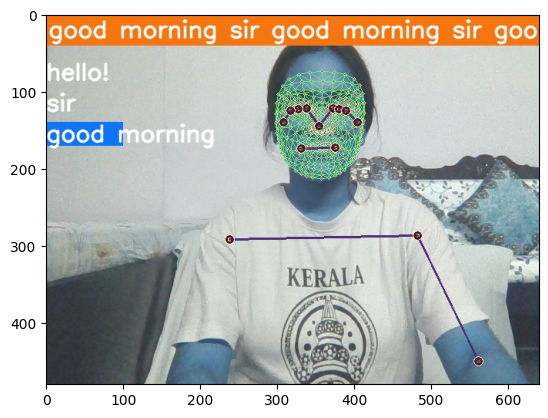

In [103]:
plt.imshow(prob_viz(res, actions, image, colors))

In [106]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good morning
<class 'mediapipe.py

In [20]:
# cap.release()
# cv2.destroyAllWindows()

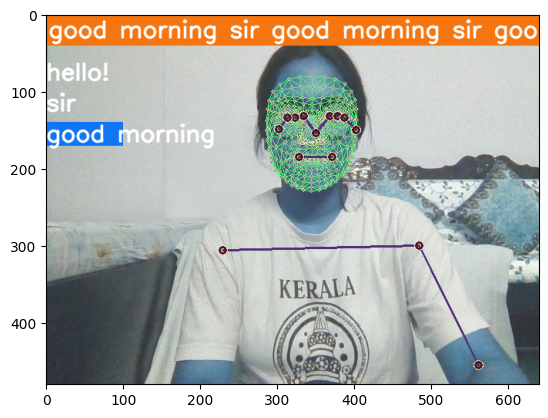

In [105]:
plt.imshow(prob_viz(res, actions, image, colors))

In [247]:
# res[np.argmax(res)] > threshold

True

In [ ]:
#(num_sequences,30,1662)

In [240]:
# model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)